# **PROYECTO FINAL DE CARRERA** #

## Información del Proyecto 03

La información que encontramos en el dataset "rating.csv" el cuál ya se encuentran los raitings calculado apartir de las horas jugadas por cada uno de los usuarios, esto se desarrollo en el proyecto 03

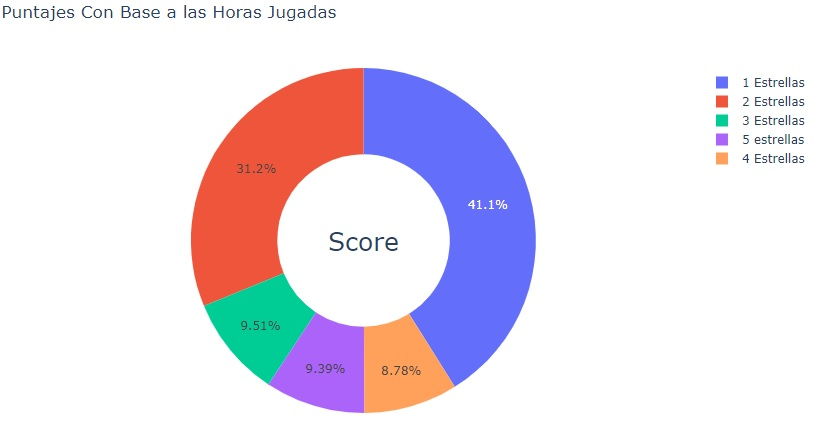

## Modelos y Métricas del Proyecto 03

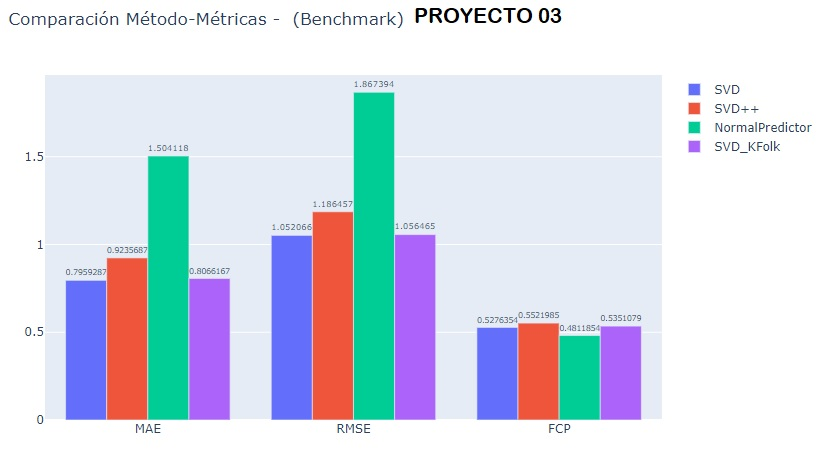

## **Objetivo**

- Se continua con él trabajo del proyecto 03
-Se pretende **realizar una comparativa entre las clases de sistemas de recomendación y su desempeño** adicionando Modelos (LIGHTFM,BPR,WARP) y la creación de un Filtro Basado en Contenido con NLP **(Filtro Colaborativo y Basado en Contenido)**:

- Utilizando **las Métricas obtenidas en el Proyecto 03** utilizando la libreria de surprice
- Utilizando el modelo con LightFM
- Utilizando las librerias LightFM y Surprice utlizando los algoritmos o modelos  SVD,NMF,BaselineOnly,SlopeOne, KNNBasic 

Estos últimos puntos como sistemas de recomendación **con filtros colaborativos**

- Utilizando las librerias rake para crear un **sistema de recomendación basado en contenido utlizando NLP (lenguaje de procesamiento Natural)**

Finalmente se menciona los resultados obtenidos de cada uno de los modelos y se muestran en el informe, mostrando las mejores métricas para los sistemas de recomendación del Proyecto 03 y Proyecto 04
- Así como una pequeña opinión sobre los sistemas basados en filtros colaborativo vs basado en contenido

In [ ]:
# DATASET - Rating Obtenido Del Proyecto 03

Sobre la información(dataset) de los videojuegos seleccionamos las carácteristicas(columnas) de nuestro producto

In [1]:
import pandas as pd
data = pd.read_csv("rating.csv")  #leemos nuestro archivo obteneido del proyecto 03
data = pd.DataFrame(data) #lo convertimos a DataFrame
print(data.shape) # imprimos la forma de nuestro DataFrame

(779951, 12)


In [21]:
games_metadata = data.drop('Unnamed: 0',axis=1).head(10000) # borramos la columna del indice de excel
games_metadata

,new_user_id,username,hours,product_id,publisher,title,genres,developer,sentiment,text,num_estrellas
0,1,Chaos Syren,0.1,725280,Vyacheslav Shilikhin,Psi Project,"['Action', 'Adventure', 'Indie', 'Simulation']",Vyacheslav Shilikhin,Positive,This would not be acceptable as an entertainme...,1.0
1,3,freakfantom,0.1,725280,Vyacheslav Shilikhin,Psi Project,"['Action', 'Adventure', 'Indie', 'Simulation']",Vyacheslav Shilikhin,Positive,Прикольная стрелялка. Взял дешево на распродаже.,1.0
2,2,Ariman1,13.2,328100,KISS ltd,Gunspell - Steam Edition,"['Adventure', 'Indie', 'RPG']",Ino-Co Plus,Mixed,Addictive RPG ! Works fine on linux though it ...,2.0
3,20,dll3z,0.4,328100,KISS ltd,Gunspell - Steam Edition,"['Adventure', 'Indie', 'RPG']",Ino-Co Plus,Mixed,do not buy this game,1.0
4,34,Nyazicat,2.2,328100,KISS ltd,Gunspell - Steam Edition,"['Adventure', 'Indie', 'RPG']",Ino-Co Plus,Mixed,For some reason I entirely derped out and boug...,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,37428,MirandaKym,21.1,284870,Artifex Mundi,9 Clues: The Secret of Serpent Creek,"['Adventure', 'Casual']",Tap It Games,Very Positive,This Hidden Object game is fairly short and th...,2.0
9996,48303,janjamoja,5.4,284870,Artifex Mundi,9 Clues: The Secret of Serpent Creek,"['Adventure', 'Casual']",Tap It Games,Very Positive,Had I not played some of the other games from ...,1.0
9997,55590,Csontzuzo,2.9,284870,Artifex Mundi,9 Clues: The Secret of Serpent Creek,"['Adventure', 'Casual']",Tap It Games,Very Positive,9 Clues: The Secret of Serpent Creek is Hidden...,1.0
9998,56830,Niggachu,6.5,284870,Artifex Mundi,9 Clues: The Secret of Serpent Creek,"['Adventure', 'Casual']",Tap It Games,Very Positive,♥♥♥♥ the lockpick achievement,1.0


## Información de datos

Para no cometer algun error al manipular nuestros datos pasamos nuestra información al dataframe "games_metadata" con esta trabajeremos en adelante

In [22]:
games_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   new_user_id    10000 non-null  int64  
 1   username       10000 non-null  object 
 2   hours          9997 non-null   float64
 3   product_id     10000 non-null  int64  
 4   publisher      9953 non-null   object 
 5   title          10000 non-null  object 
 6   genres         10000 non-null  object 
 7   developer      9982 non-null   object 
 8   sentiment      10000 non-null  object 
 9   text           9959 non-null   object 
 10  num_estrellas  10000 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 859.5+ KB


###################################################################################################################################################################################################
# **UTILIZANDO LIGHTFM**
###################################################################################################################################################################################################

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn import preprocessing
from lightfm import LightFM
from scipy.sparse import csr_matrix 
from scipy.sparse import coo_matrix 
from sklearn.metrics import roc_auc_score
import time
from lightfm.evaluation import auc_score
from lightfm.evaluation import precision_at_k
import pickle
import re
import seaborn as sns

In [23]:
games_metadata_selected = games_metadata.copy()

Pasamos las carácteristicas a un tipo de dato manejable

In [24]:
#antes de fusionarlos los convertimos a string para que Rake pueda leerlos
games_metadata_selected['genres'] = games_metadata_selected['genres'].astype(str)
games_metadata_selected['publisher'] = games_metadata_selected['publisher'].astype(str)
games_metadata_selected['title'] = games_metadata_selected['title'].astype(str)
games_metadata_selected['developer'] = games_metadata_selected['developer'].astype(str)
games_metadata_selected['sentiment'] = games_metadata_selected['sentiment'].astype(str)
games_metadata_selected['text'] = games_metadata_selected['text'].astype(str)

In [25]:
interactions_selected = games_metadata_selected[['new_user_id','product_id','num_estrellas']] 
interactions_selected

,new_user_id,product_id,num_estrellas
0,1,725280,1.0
1,3,725280,1.0
2,2,328100,2.0
3,20,328100,1.0
4,34,328100,1.0
...,...,...,...
9995,37428,284870,2.0
9996,48303,284870,1.0
9997,55590,284870,1.0
9998,56830,284870,1.0


## Creación de Diccionarios De los Usuarios y  de los Items

**Creamos nuestro diccionario de usuarios**, esto es para saber cuáles son el id o identificador de los usuarios en mi información(dataset), esto lo podemos utilizar cuando deseemos obtener una recomendación de los 10 videjuegos apartir del id de nuestro usuario

In [26]:
user_id = list(games_metadata_selected.index)
user_dict = {}
counter = 0 
for i in user_id:
    user_dict[i] = counter
    counter += 1

In [27]:
games_metadata_selected

,new_user_id,username,hours,product_id,publisher,title,genres,developer,sentiment,text,num_estrellas
0,1,Chaos Syren,0.1,725280,Vyacheslav Shilikhin,Psi Project,"['Action', 'Adventure', 'Indie', 'Simulation']",Vyacheslav Shilikhin,Positive,This would not be acceptable as an entertainme...,1.0
1,3,freakfantom,0.1,725280,Vyacheslav Shilikhin,Psi Project,"['Action', 'Adventure', 'Indie', 'Simulation']",Vyacheslav Shilikhin,Positive,Прикольная стрелялка. Взял дешево на распродаже.,1.0
2,2,Ariman1,13.2,328100,KISS ltd,Gunspell - Steam Edition,"['Adventure', 'Indie', 'RPG']",Ino-Co Plus,Mixed,Addictive RPG ! Works fine on linux though it ...,2.0
3,20,dll3z,0.4,328100,KISS ltd,Gunspell - Steam Edition,"['Adventure', 'Indie', 'RPG']",Ino-Co Plus,Mixed,do not buy this game,1.0
4,34,Nyazicat,2.2,328100,KISS ltd,Gunspell - Steam Edition,"['Adventure', 'Indie', 'RPG']",Ino-Co Plus,Mixed,For some reason I entirely derped out and boug...,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,37428,MirandaKym,21.1,284870,Artifex Mundi,9 Clues: The Secret of Serpent Creek,"['Adventure', 'Casual']",Tap It Games,Very Positive,This Hidden Object game is fairly short and th...,2.0
9996,48303,janjamoja,5.4,284870,Artifex Mundi,9 Clues: The Secret of Serpent Creek,"['Adventure', 'Casual']",Tap It Games,Very Positive,Had I not played some of the other games from ...,1.0
9997,55590,Csontzuzo,2.9,284870,Artifex Mundi,9 Clues: The Secret of Serpent Creek,"['Adventure', 'Casual']",Tap It Games,Very Positive,9 Clues: The Secret of Serpent Creek is Hidden...,1.0
9998,56830,Niggachu,6.5,284870,Artifex Mundi,9 Clues: The Secret of Serpent Creek,"['Adventure', 'Casual']",Tap It Games,Very Positive,♥♥♥♥ the lockpick achievement,1.0


**Creamos nuestro diccionario de Items** 

In [28]:
item_dict = {} 
df = games_metadata [['product_id', 'title']].sort_values('product_id').reset_index()
for i in  range (df.shape [0]): 
    item_dict [(df.loc [i, 'product_id'])] = df.loc [i, 'title']

## Transformamos nuestros Datos

In [29]:
# dummify características categóricas 
games_metadata_selected_transformed = pd.get_dummies(games_metadata_selected ,columns = ['username','publisher', 'genres',
                                                                                         'developer','sentiment','text'])
games_metadata_selected_transformed = games_metadata_selected_transformed.sort_values('product_id'). reset_index (). drop ('index', axis = 1)
games_metadata_selected_transformed.head (5)

,new_user_id,hours,product_id,title,num_estrellas,username_!?,username_!Sweet~Ninjas!,"username_""Bob"" the Space Cadet","username_""K!R@""",username_#NV,...,text_游戏是个好游戏，就是联机的时候容易掉线。\nit's so easy to off online when i play with my friend :),text_玩了一会 感觉非常不错啊 非常适合国人的一款横版小游戏 ，\n虽然游戏关卡不多 单人通关还可以~ 但是跟机油联机玩好难啊~ 非常不错 支持一下！,text_虽然没有英文，完全看不懂，但是感觉蛮好玩,text_这游戏感觉还不错 要是能把随机性调低点就好了 还有多加一个存档就好了 是 真tm难,text_關卡玩法重覆、打擊感不足。\n同樣價錢，Mitsurugi Kamui Hikae 絕對會給你更好的體驗。,text_아캄버스 시리즈의 시작을 알리는 기념비적인 어사일럼. 수없이 나왔다 소리도 없이 사라지는 히어로게임들중에 최고라 칭할수있는 시리즈의 시작이다. 빌런과 배트맨의 캐릭터성을 너무나도 잘살린 여러가지 연출과 초보자들에게도 쉽게 다가갈수있는 전투방식. 잡입게임으로도 플레이가 가능할정도의 맵디자인 패드사용시 알게돼는 너무나도 뛰어난 타격감. GOTY라는 타이틀이 전혀 어색하지가 않다. 최고 단점으로는 연출에만 집중한듯한 힘빠지는 보스전. 그 구성과 여러가지 캐릭터성은 잘살린듯하지만 자세히 보면 그저 평소 전투의 연속된 측면이 많다. 리들러 챌린지는 도전과제를 달성한다는 재미와 아캄버스의 세계관을 좀더 잘알수있게 해주는 측면도 있지만. 누군가에게는 그저 안해도 그만인 숨은 트로피 찾기가 된다. 어찌보면 양날의 검같은 시스템. 여러가지로 많은 재미를 안겨주었지만 2회차 플레이의 동기화를 못찾게 해주고. 리들러챌린지의 반만큼만 사이드 미션이 있다면 어쨌을까라는 아쉬움도 많이 남는다. 너무나도 괜찮은 작품이기에 그만큼 사소한것도 아쉬워지는 작품이다.,text_제가 좋아하는 스타일의 게임은 아님.. 재미없게 했음.,"text_｡ﾟ･（>﹏<）･ﾟ｡\nAll right, I'm pretty sure almost everyone would compare this to The Walking Dead series by Telltale games but hey, Square Enix didn't copied them, in fact, this type of game - point and click type of game has been around since 2000s. Heck, probably much mroe earlier but i digress to my initial point, to review this game.\nThe art itself is like they were designed using cardboards. Yes, they can't be bothered or don't have the proper budget to do a Square Enix style with amazing 3d character models etc etc but that's a minor thing to complain about for £3.99. Personally, I like it. The object models blends in very well with the scenery although it could be improved but hey, simplicity at its best, ya?\nThe music could be more superfluous but thats just me. In any case, every bgm in the game goes well with the scene / event it plays. Especially when the protagonists reminisce, the nostalgic feeling is there.\n- completed the game in 2.5 hours\nHate to admit it but i had a hard time solving... well more like looking for how to proceed the game near the end where you need to look for those precision tools. I wasn't looking hard or wide enough that made me take a break for 2-3 hours before tackling the game once more.\nYour gameplay is impacted according to the choices you made throughout each episodes. There are 3 save slots and I could tell that there are 2-3 branches to which path you're going to make for Max as she has the gift of you know what. If you feel like going full Goody two shoes, you could! The badass party girl? You got it! Or the neutral professional photographer oracle ermm.. girl. Go out there and try it!\n= kek\nAs of now, I'm neutral but I'll give it a thumbs up. Once the complete game is out and had fully grasp the story and how it affected me as a a player. Right there and by then, I'd throw the harsh critic.\nI'm pretty sure I missed some points the needs to be discerned much to my chagrin but whenever I do that, I always end up giving spoilers! Therefore I'll refrain from doing so. Enjoy!",text_👍,text_🤘
0,2086,7.5,1840,Source Filmmaker,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,441,1.2,1840,Source Filmmaker,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,482,6.1,1840,Source Filmmaker,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,510,61.8,1840,Source Filmmaker,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,524,4.3,1840,Source Filmmaker,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Creamos la Matrix CSR - Compressed Sparse Row (CSR)

In [33]:
# convertir a matriz csr 
games_metadata_csr = csr_matrix(games_metadata_selected_transformed.drop('product_id', axis=1).drop('title', axis=1).drop('new_user_id', axis=1).values, dtype= float)

- Formato comprimido por filas denominada como matrices sparse, huecas o dispersas.
- Los esquemas de almacenamiento: COO: Formato de coordenadas I CSR: Comprimido por filas (Compressed Sparse Row) I CSC: Comprimido por columnas
- Tratan de explotar las carácterısticas de las matrices dispersas y almacenar basicamente los elementos no nulos

_______________
- Cree una tabla dinámica al estilo de una hoja de cálculo como un DataFrame.
- Los niveles de la tabla dinámica se almacenarán en objetos MultiIndex (índices jerárquicos) en el índice y las columnas del DataFrame de resultado.
- La función Python Pandas pandas.pivot_table() evita la repetición de datos del DataFrame. Resume los datos y aplica diferentes funciones de agregación a los datos.

In [34]:
user_games_interaction = pd.pivot_table(games_metadata_selected, index='new_user_id', columns='product_id', values='num_estrellas')
user_games_interaction   #interactions_selected

product_id,1840,3390,7510,35140,35600,214490,214610,219190,222160,230050,...,537740,570980,613420,620900,631920,657240,658790,671270,725280,736860
new_user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0
5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502781,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502788,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502845,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# fill missing values with 0
user_games_interaction = user_games_interaction.fillna(0)
user_id = list(user_games_interaction.index)
user_dict = {}
counter = 0 
for i in user_id:
    user_dict[i] = counter
    counter += 1
# convert to csr matrix
user_games_interaction_csr = csr_matrix(user_games_interaction.values)
user_games_interaction_csr

<9608x64 sparse matrix of type '<class 'numpy.float64'>'
	with 9767 stored elements in Compressed Sparse Row format>

In [42]:
#Modelos
model = LightFM(loss='warp',
                random_state=2016,
                learning_rate=0.90,
                no_components=150,
                user_alpha=0.000005)
model = model.fit(user_games_interaction_csr,
                  epochs=100,
                  num_threads=16, verbose=False)

In [43]:
def sample_recommendation_user(model, interactions, user_id, user_dict, 
                               item_dict,threshold = 0,nrec_items = 10, show = True):

    n_users, n_items = interactions.shape
    user_x = user_dict[user_id]
    scores = pd.Series(model.predict(user_x,np.arange(n_items)))
    scores.index = interactions.columns
    scores = list(pd.Series(scores.sort_values(ascending=False).index))
    
    known_items = list(pd.Series(interactions.loc[user_id,:] \
                                 [interactions.loc[user_id,:] > threshold].index) \
								 .sort_values(ascending=False))
    
    scores = [x for x in scores if x not in known_items]
    return_score_list = scores[0:nrec_items]
    known_items = list(pd.Series(known_items).apply(lambda x: item_dict[int(x)]))
    scores = list(pd.Series(return_score_list).apply(lambda x: item_dict[int(x)]))
    if show == True:
        print("Known Likes:")
        counter = 1
        for i in known_items:
            print(str(counter) + '- ' + i)
            counter+=1

        print("\n Recommended Items:")
        counter = 1
        for i in scores:
            print(str(counter) + '- ' + i)
            counter+=1
    return return_score_list

# Top N Recomendaciones -LightFM

In [44]:
sample_recommendation_user(model, user_games_interaction, 13, user_dict, item_dict)

Known Likes:
1- Broken Age

 Recommended Items:
1- LEGO® Pirates of the Caribbean: The Video Game
2- Blood of the Werewolf
3- Alien: Isolation
4- DLC Quest
5- Feeding Frenzy 2 Deluxe
6- Lost Castle
7- Agatha Christie - The ABC Murders
8- Ultratron
9- Ittle Dew
10- Tracks - The Train Set Game


[311770, 260250, 214490, 230050, 3390, 434650, 374900, 219190, 241320, 657240]

# Evaluamos el Modelo - LightFM 

In [60]:
 def informed_train_test(rating_df, train_ratio):
    split_cut = np.int(np.round(rating_df.shape[0] * train_ratio))
    train_df = rating_df.iloc[0:split_cut]
    test_df = rating_df.iloc[split_cut::]
    test_df = test_df[(test_df['new_user_id'].isin(train_df['new_user_id'])) & (test_df['product_id'].isin(train_df['product_id']))]
    id_cols = ['new_user_id', 'product_id']
    trans_cat_train = dict()
    trans_cat_test = dict()
    for k in id_cols:
        cate_enc = preprocessing.LabelEncoder()
        trans_cat_train[k] = cate_enc.fit_transform(train_df[k].values)
        trans_cat_test[k] = cate_enc.transform(test_df[k].values)

    # --- Encode ratings:
    cate_enc = preprocessing.LabelEncoder()
    ratings = dict()
    ratings['train'] = cate_enc.fit_transform(train_df.num_estrellas)
    ratings['test'] = cate_enc.transform(test_df.num_estrellas)

    n_users = len(np.unique(trans_cat_train['new_user_id']))
    n_items = len(np.unique(trans_cat_train['product_id']))


    train = coo_matrix((ratings['train'], (trans_cat_train['new_user_id'], \
                                                          trans_cat_train['product_id'])) \
                                      , shape=(n_users, n_items))
    test = coo_matrix((ratings['test'], (trans_cat_test['new_user_id'], \
                                                        trans_cat_test['product_id'])) \
                                     , shape=(n_users, n_items))
    return train, test, train_df  

# Modelo LIGHTFM - MÉTRICAS

In [86]:
train,test, raw_train_df = informed_train_test(games_metadata, .8)

model = LightFM(loss='warp',
                random_state=200,
                learning_rate=0.80,
                no_components=15,
                user_alpha=0.000005)
model = model.fit(train,
                  epochs=12,
                  num_threads=12, verbose=False)

precision_train = precision_at_k(model, train).mean()
precision_test = precision_at_k(model, test).mean()
auc_train = auc_score(model, train).mean()
auc_test= auc_score(model, test).mean()
print ('*************MÉTRICAS******************')
print('\n precision_at_k - train_set : {} .' .format ( precision_train) )
print('\n precision_at_k - test_set : {} .' .format (precision_test) )
print('\n auc_score - train_set : {} .' .format (auc_train) )
print('\n auc_score - test_set : {} .' .format (auc_test) )

*************MÉTRICAS******************

 precision_at_k - train_set : 0.09885655343532562 .

 precision_at_k - test_set : 0.0833333358168602 .

 auc_score - train_set : 0.9748786687850952 .

 auc_score - test_set : 0.7008547186851501 .


############################################################################################################################################################################################
# SYSTEMA DE RECOMENDACIÓN CON SURPRISE Y LIGHT FM - Utilizando:
Estos ya se habian utilizado en el proyecto 03 sin embargo para esta ocación se utilizan con LightFM

- SVD, 
- NMF,
- BaselineOnly,
- SlopeOne, KNNBasic

############################################################################################################################################################################################

In [121]:
# Import surprise modules
from surprise import Dataset
from surprise import Reader
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from surprise import SVD, SVDpp, NMF, SlopeOne, CoClustering, KNNBaseline, KNNWithZScore, KNNWithMeans, KNNBasic, BaselineOnly, NormalPredictor
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [122]:
# Dictionaty of user and items
#users = list(games_metadata_selected['new_user_id'].unique())
#items = list(games_metadata_selected['product_id'].unique())

In [123]:
#def game_id_to_name(id):
#    return games_metadata.loc[games_metadata_selected['new_user_id']==id].title

In [217]:
#game_id_to_name(3)

1    Psi Project
Name: title, dtype: object

In [235]:
games_metadata_selected2 = games_metadata.copy()[0:10000]

Aclaró que se obtuvo la información de un trozo de información de la base por capacidad de Memoria de mi Computadora

In [236]:
# Function to create an interaction matrix dataframe from transactional type interactions
interactions2 = games_metadata_selected2.groupby(['new_user_id', 'product_id'])['num_estrellas'].sum().unstack().reset_index().fillna(0).set_index('new_user_id')
    #games_metadata_selected
interactions2.head()

product_id,1840,3390,7510,35140,35600,214490,214610,219190,222160,230050,...,537740,570980,613420,620900,631920,657240,658790,671270,725280,736860
new_user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Usamos algoritmos de SURPRISE

- Obtenemos solo un trozo de la información debido al espacio de Memoria, ya que mi computadora tiende a quedarse congelada

In [237]:
games_metadata2 = data.drop('Unnamed: 0',axis=1).head(10000) # UTILIZAMOS SOLO N registros por razones de  rendimiento en mi Memoria Ram
games_metadata2

,new_user_id,username,hours,product_id,publisher,title,genres,developer,sentiment,text,num_estrellas
0,1,Chaos Syren,0.1,725280,Vyacheslav Shilikhin,Psi Project,"['Action', 'Adventure', 'Indie', 'Simulation']",Vyacheslav Shilikhin,Positive,This would not be acceptable as an entertainme...,1.0
1,3,freakfantom,0.1,725280,Vyacheslav Shilikhin,Psi Project,"['Action', 'Adventure', 'Indie', 'Simulation']",Vyacheslav Shilikhin,Positive,Прикольная стрелялка. Взял дешево на распродаже.,1.0
2,2,Ariman1,13.2,328100,KISS ltd,Gunspell - Steam Edition,"['Adventure', 'Indie', 'RPG']",Ino-Co Plus,Mixed,Addictive RPG ! Works fine on linux though it ...,2.0
3,20,dll3z,0.4,328100,KISS ltd,Gunspell - Steam Edition,"['Adventure', 'Indie', 'RPG']",Ino-Co Plus,Mixed,do not buy this game,1.0
4,34,Nyazicat,2.2,328100,KISS ltd,Gunspell - Steam Edition,"['Adventure', 'Indie', 'RPG']",Ino-Co Plus,Mixed,For some reason I entirely derped out and boug...,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,37428,MirandaKym,21.1,284870,Artifex Mundi,9 Clues: The Secret of Serpent Creek,"['Adventure', 'Casual']",Tap It Games,Very Positive,This Hidden Object game is fairly short and th...,2.0
9996,48303,janjamoja,5.4,284870,Artifex Mundi,9 Clues: The Secret of Serpent Creek,"['Adventure', 'Casual']",Tap It Games,Very Positive,Had I not played some of the other games from ...,1.0
9997,55590,Csontzuzo,2.9,284870,Artifex Mundi,9 Clues: The Secret of Serpent Creek,"['Adventure', 'Casual']",Tap It Games,Very Positive,9 Clues: The Secret of Serpent Creek is Hidden...,1.0
9998,56830,Niggachu,6.5,284870,Artifex Mundi,9 Clues: The Secret of Serpent Creek,"['Adventure', 'Casual']",Tap It Games,Very Positive,♥♥♥♥ the lockpick achievement,1.0


In [238]:
interactions_selected2 = games_metadata_selected2[['new_user_id','product_id','num_estrellas']] 
interactions_selected2

,new_user_id,product_id,num_estrellas
0,1,725280,1.0
1,3,725280,1.0
2,2,328100,2.0
3,20,328100,1.0
4,34,328100,1.0
...,...,...,...
9995,37428,284870,2.0
9996,48303,284870,1.0
9997,55590,284870,1.0
9998,56830,284870,1.0


In [239]:
# Specific reader for surpirse to work, interactions_selected (contiene las 3 columnas id's y num_estrellaas)
reader = Reader(rating_scale= (1,5))
data_sp = Dataset.load_from_df(interactions_selected2, reader=reader)

In [240]:
# We'll use the famous SVD algorithm.
algo =  [SVD(),  BaselineOnly(), SlopeOne(), KNNBasic()]

names = [algo[i].__class__.__name__ for i in range(len(algo))]

result = np.zeros((len(algo),4))            
for i in range(len(algo)):
    print('Procesando ', names[i], '...')
    tab = cross_validate(algo[i], data_sp,cv=5, verbose = True)
    rmse = np.mean(tab['test_rmse']).round(3)
    mae = np.mean(tab['test_mae']).round(3)
    ft = np.mean(tab['fit_time']).round(3)
    tt = np.mean(tab['test_time']).round(3)
    result[i]=[rmse, mae, ft, tt]
    
result = result.round(3)
result = pd.DataFrame(result, index = names, columns =['RMSE','MAE','fit_time','test_time'])

Procesando  SVD ...
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.5146  0.5653  0.5329  0.5591  0.5343  0.5412  0.0186  
MAE (testset)     0.3515  0.3791  0.3588  0.3776  0.3723  0.3679  0.0109  
Fit time          1.18    1.15    1.17    1.23    1.17    1.18    0.03    
Test time         0.08    0.03    0.02    0.02    0.02    0.04    0.02    
Procesando  BaselineOnly ...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.5266  0.5650  0.5595  0.5351  0.5318  0.5436  0.0156  
MAE (testset)     0.3627  0.3827  0.3690  0.3622  0.3626  0.3678  0.0078  
Fit time          0.07    0.05    0.07    0.08    0.10    0.07    0.02    
Test

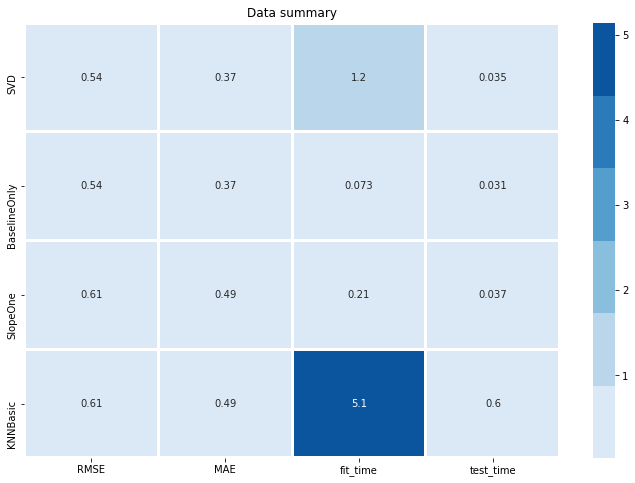

In [241]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(result,
            annot=True,linecolor="w",
            linewidth=2,cmap=sns.color_palette("Blues"))
plt.title("Data summary")  ## información de los resultados de los modelos de surprice
plt.show()

## Mejoramiento de Modelos

Tratamos de mejorar el modelo KNNBAsic con un GridSearchCV pero no mejora del todo sigue manteniendose igual

In [243]:
param_grid = {'n_epochs': [5, 10, 20], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6], 'n_factors' : [15, 30, 100]}

gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data_sp)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

################################################################################################################################################################################################################
# Entrenando los Modelos
################################################################################################################################################################################################################

## CON BPR

In [244]:
from lightfm import LightFM
from lightfm.evaluation import precision_at_k
from lightfm.evaluation import auc_score

model = LightFM(learning_rate=0.05, loss='bpr')
model.fit(train, epochs=10)

B_train_precision = precision_at_k(model, train, k=10).mean()
B_test_precision = precision_at_k(model, test, k=10, train_interactions=train).mean()

B_train_auc = auc_score(model, train).mean()
B_test_auc = auc_score(model, test, train_interactions=train).mean()

print('Precision: train %.2f, test %.2f.' % (B_train_precision, B_test_precision))
print('AUC: train %.2f, test %.2f.' % (B_train_auc, B_test_auc))

Precision: train 0.10, test 0.03.
AUC: train 0.98, test 0.39.


## CON WARP

El modelo WARP, por otro lado, optimiza la precisión k; deberíamos esperar que su rendimiento sea mejor en precisión.
- Como vemos mejora pero tambien mejora WARP
- La mejor opciónes WARP por su score en test tanto como en el train

In [245]:
model = LightFM(learning_rate=0.05, loss='warp')

model.fit_partial(train, epochs=10)

L_train_precision = precision_at_k(model, train, k=10).mean()
L_test_precision = precision_at_k(model, test, k=10, train_interactions=train).mean()

L_train_auc = auc_score(model, train).mean()
L_test_auc = auc_score(model, test, train_interactions=train).mean()

print('Precision: train %.2f, test %.2f.' % (L_train_precision, L_test_precision))
print('AUC: train %.2f, test %.2f.' % (L_train_auc, L_test_auc))

Precision: train 0.10, test 0.10.
AUC: train 0.99, test 0.86.


## Interpretación

En este caso vemos como se visualiza un mejor rendimiento por parte de la métrica de AUC con el modelo WARP el cuál mejora al BPR pero al mismo tiempo mejorá esta misma

## Aprender a clasificar usando la pérdida de WARP

In [148]:



alpha = 1e-05
epochs = 10
num_components = 32

warp_model = LightFM(no_components=num_components,
                    loss='warp',
                    learning_schedule='adagrad',
                    max_sampled=100,
                    user_alpha=alpha,
                    item_alpha=alpha)

bpr_model = LightFM(no_components=num_components,
                    loss='bpr',
                    learning_schedule='adagrad',
                    user_alpha=alpha,
                    item_alpha=alpha)

warp_duration = []
bpr_duration = []
warp_auc = []
bpr_auc = []

for epoch in range(epochs):
    start = time.time()
    warp_model.fit_partial(train, epochs=10)
    warp_duration.append(time.time() - start)
    warp_auc.append(auc_score(warp_model, test, train_interactions=train).mean())

for epoch in range(epochs):
    start = time.time()
    bpr_model.fit_partial(train, epochs=10)
    bpr_duration.append(time.time() - start)
    bpr_auc.append(auc_score(bpr_model, test, train_interactions=train).mean())

# Resultado de las epochs de los modelos

In [149]:
warp_auc

[0.85526305,
 0.8421052,
 0.82894737,
 0.82894737,
 0.8245614,
 0.82017547,
 0.8157895,
 0.8157895,
 0.81140345,
 0.81140345]

In [150]:
bpr_auc

[0.4122807,
 0.40350875,
 0.40350875,
 0.40350875,
 0.4078947,
 0.4210526,
 0.4210526,
 0.4210526,
 0.4122807,
 0.4122807]

## Entre Más se acerque a 1 es mejor el modelo

- Vemos que el WARP con la métrica AUC es mejor que el de BPR

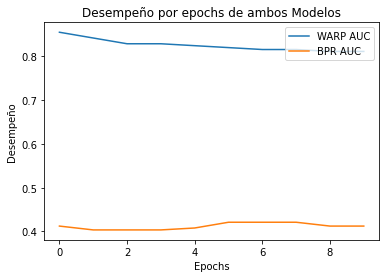

In [151]:
x = np.arange(epochs)
plt.plot(x, np.array(warp_auc))
plt.plot(x, np.array(bpr_auc))
plt.legend(['WARP AUC', 'BPR AUC'], loc='upper right')
plt.title("Desempeño por epochs de ambos Modelos")
plt.xlabel("Epochs")
plt.ylabel("Desempeño")
plt.show()

# Velocidad de Ejecución

Vemos que WARP es más lento en su ejecución comparado con BPR

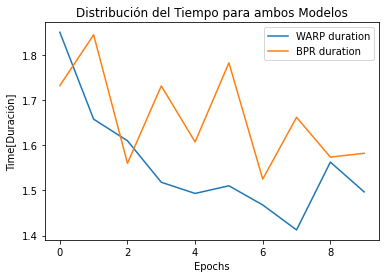

In [153]:
x = np.arange(epochs)
plt.plot(x, np.array(warp_duration))
plt.plot(x, np.array(bpr_duration))
plt.legend(['WARP duration', 'BPR duration'], loc='upper right')
plt.title("Distribución del Tiempo para ambos Modelos")
plt.xlabel("Epochs")
plt.ylabel("Time[Duración]")
plt.show()

# Probamos Llamando a los 15 (ids) de items recomendados para el item = X

In [259]:
from scipy import sparse
# Function to run matrix-factorization algorithm
x = sparse.csr_matrix(interactions2.values)
model = LightFM(no_components= 150, loss='warp')
model.fit(x,epochs=3000,num_threads = 4)

In [261]:
def sample_recommendation_item_tmp(model,interactions,item_id,user_dict,item_dict,number_of_user):
    n_users, n_items = interactions.shape
    x = np.array(interactions.columns)
    rang=np.arange(n_users)
    sorte = x.searchsorted(item_id)
    rep=np.repeat(sorte, n_users)
    scores = pd.Series(model.predict(rang, rep))
    user_list = list(interactions.index[scores.sort_values(ascending = False).head(number_of_user).index])
    return user_list 
sample_recommendation_item_tmp(model = model,
                           interactions = interactions2,
                           item_id = 3, #Numero de id de nuestro item
                           user_dict = user_dict,
                           item_dict = item_dict,
                           number_of_user = 15)


[55,
 1073,
 210,
 1619,
 984,
 555,
 192,
 581,
 879,
 954,
 1033,
 1552,
 1973,
 189,
 1010]

####################################################################################################################################################################################################
# SISTEMA DE RECOMENDACIÓN BASADO EN CONTENIDO UTILIZANDO (NLP)
####################################################################################################################################################################################################

In [1262]:
Top_10=data.copy()
the_top = Top_10.drop_duplicates(subset=['title'])
games_populares  = the_top[['title','genres','publisher','developer','text','sentiment']] 

In [1263]:
games_unics = games_populares['title'].unique()
games_unics

array(['Psi Project', 'Gunspell - Steam Edition', 'Stone Age Wars', ...,
       'The Possession', 'MIND SHIFT 🔲', 'XO-Planets'], dtype=object)

## Dataset con la Información de las Caráccteristicas del Item

In [1264]:
games_populares.head()

,title,genres,publisher,developer,text,sentiment
0,Psi Project,"['Action', 'Adventure', 'Indie', 'Simulation']",Vyacheslav Shilikhin,Vyacheslav Shilikhin,This would not be acceptable as an entertainme...,Positive
2,Gunspell - Steam Edition,"['Adventure', 'Indie', 'RPG']",KISS ltd,Ino-Co Plus,Addictive RPG ! Works fine on linux though it ...,Mixed
9,Stone Age Wars,"['Action', 'Indie', 'Strategy']",Back To Basics Gaming,Permafrost Studio,I like this game.,Positive
16,Green Ranch,['Casual'],Immanitas Entertainment,Palaplay,Funny. A fast sim game.,5 user reviews
17,Somewhere on Zibylon,"['Action', 'Indie']",Mykhail Konokh,Mykhail Konokh,Somewhere on Zibylon:\n~~~~~~~~~~~~~~~~~~\nZib...,Positive


In [1265]:
games_populares.shape

(12658, 6)

In [1297]:
# Reiniciar el indice
games_populares = games_populares.reset_index(drop = True)
games_populares

,title,genres,publisher,developer,text,sentiment
0,Psi Project,"['Action', 'Adventure', 'Indie', 'Simulation']",Vyacheslav Shilikhin,Vyacheslav Shilikhin,This would not be acceptable as an entertainme...,Positive
1,Gunspell - Steam Edition,"['Adventure', 'Indie', 'RPG']",KISS ltd,Ino-Co Plus,Addictive RPG ! Works fine on linux though it ...,Mixed
2,Stone Age Wars,"['Action', 'Indie', 'Strategy']",Back To Basics Gaming,Permafrost Studio,I like this game.,Positive
3,Green Ranch,['Casual'],Immanitas Entertainment,Palaplay,Funny. A fast sim game.,5 user reviews
4,Somewhere on Zibylon,"['Action', 'Indie']",Mykhail Konokh,Mykhail Konokh,Somewhere on Zibylon:\n~~~~~~~~~~~~~~~~~~\nZib...,Positive
...,...,...,...,...,...,...
12653,Ragtag Adventurers,"['Action', 'Adventure', 'Indie', 'Early Access']",Prime Time Studio,Prime Time Studio,"Nice little boss fight game, the couch co-op w...",5 user reviews
12654,Ballway,"['Casual', 'Indie']",Freedomize Studio,Freedomize Studio,Ballway is a nice little game with relaxing mu...,Positive
12655,The Possession,NaN,NaN,NaN,try The Conjuring 7/10,1 user reviews
12656,MIND SHIFT 🔲,"['Casual', 'Indie']",DRUNKEN APES,DRUNKEN APES,ｄａｒｋ ａｅｔｈｅｔｉｃｓ\nｍａｎｉｆｏｌｄ ｌｅｖｅｌｓ\nｅｖｏｌｖｉｎｇ ｄｉｆｆ...,6 user reviews


## Convertimos las variables  a Cadena

In [1298]:
games = games_populares.copy()
games.head()

,title,genres,publisher,developer,text,sentiment
0,Psi Project,"['Action', 'Adventure', 'Indie', 'Simulation']",Vyacheslav Shilikhin,Vyacheslav Shilikhin,This would not be acceptable as an entertainme...,Positive
1,Gunspell - Steam Edition,"['Adventure', 'Indie', 'RPG']",KISS ltd,Ino-Co Plus,Addictive RPG ! Works fine on linux though it ...,Mixed
2,Stone Age Wars,"['Action', 'Indie', 'Strategy']",Back To Basics Gaming,Permafrost Studio,I like this game.,Positive
3,Green Ranch,['Casual'],Immanitas Entertainment,Palaplay,Funny. A fast sim game.,5 user reviews
4,Somewhere on Zibylon,"['Action', 'Indie']",Mykhail Konokh,Mykhail Konokh,Somewhere on Zibylon:\n~~~~~~~~~~~~~~~~~~\nZib...,Positive


In [1299]:
#Convertimos los campos a String
games['genres'] = games['genres'].astype(str)
#antes de fusionarlos los convertimos a string para que Rake pueda leerlos
games['publisher'] = games['publisher'].astype(str)
#games['publisher']
games['title'] = games['title'].astype(str)
#games['title']
games['developer'] = games['developer'].astype(str)
#convertimos a string el campo sentimet
games['sentiment'] = games['sentiment'].astype(str)
#games['sentiment']
games['text'] = games['text'].astype(str)
#games['sentiment']

## Obtenemos las Palabras Claves - Procesamiento previo de Datos

In [1300]:
import RAKE 
import operator

In [1301]:
stop_dir = "SmartStoplist.txt"#palabras que son irrelevantes que podrian estar dentro del texto como artículos, pronombres, preposiciones, adverbios
rake_object = RAKE.Rake(stop_dir)

In [1302]:
def sort_Tuple(tup):
    tup.sort(key = lambda x: x[1])
    return tup

In [1306]:
    
# initializing the new column
games['Key_words'] = ""
games['Ranking_Key_words'] = ""
games['Phrases_with_score'] = ""


for index, row in games.iterrows():
    text = row['text']
 

    r = Rake()
# extracting the words by passing the text
    key_words = r.extract_keywords_from_text(text) 
    
    key_frases = r.get_ranked_phrases()
    
    
# getting the dictionary whith key words as keys and their scores as values
    key_words_dict_scores = r.get_word_degrees()    
    phrases_with_scores = r.get_ranked_phrases_with_scores()

    
# assigning the key words to the new column for the corresponding movie
    row['Key_words'] = list(key_words_dict_scores.keys()) # palabras claves del texto
    row['Ranking_Key_words'] = list(key_words_dict_scores.values())  #Ranking del las palabras claves del Texto
    row['Phrases_with_score'] = list(phrases_with_scores) #frases del texto con su score


# Rating de las Palabras

In [1304]:
games[['Key_words','Ranking_Key_words','Phrases_with_score']]

,Key_words,Ranking_Key_words,Phrases_with_score
0,"[bring, day, story, effort, acceptable, would,...","[1, 1, 1, 1, 1, 1, 1, 3, 5, 3, 1, 2, 1]","[(8.5, entertainment even back), (4.5, even en..."
1,"[based, rpg, fans, minor, bugs, works, fine, a...","[3, 5, 3, 2, 2, 2, 2, 2, 1, 2, 2, 1]","[(8.5, based rpg fans), (4.5, addictive rpg), ..."
2,"[game, like]","[1, 1]","[(1.0, like), (1.0, game)]"
3,"[fast, sim, game, funny]","[3, 3, 3, 1]","[(9.0, fast sim game), (1.0, funny)]"
4,"[drone, actually, somewhere, lure, enemy, dron...","[10, 2, 9, 3, 5, 6, 1, 2, 6, 3, 1, 1, 2, 4, 2,...","[(18.75, also rockets placed around zibylon), ..."
...,...,...,...
12653,,,
12654,,,
12655,,,
12656,,,


## Peso de cada una de las palabras de la fila del Dataset ( los primeras 10)

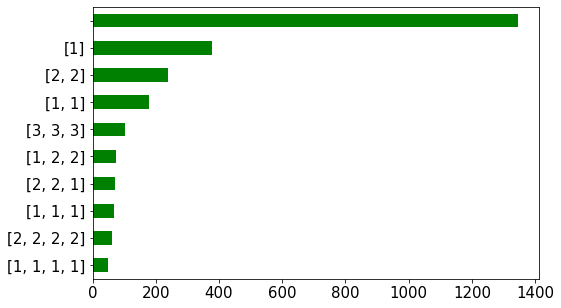

In [1305]:
games['Ranking_Key_words'].value_counts()[0:10].plot(kind = 'barh', figsize=[8,5], fontsize=15, color='green').invert_yaxis()

## Preprosesamiento - Pasamos a Minusculas y eliminamos espacios, en los campos ( genres, publisher, developer, text)

In [1307]:
games['text'] = games['text'].map(lambda x: x.split(','))
games['genres'] = games['genres'].map(lambda x: x.split(','))
games['publisher'] = games['publisher'].map(lambda x: x.split(','))
games['developer'] = games['developer'].map(lambda x: x.split(','))

for index, row in games.iterrows():
    row['text'] = [x.lower().replace(' ','') for x in row['text']]
    row['genres'] = [x.lower().replace(' ','') for x in row['genres']]
    row['publisher'] = [x.lower().replace(' ','') for x in row['publisher']]
    row['developer'] = [x.lower().replace(' ','') for x in row['developer']]
games[['title','genres','publisher','developer','text','Key_words']] 

,title,genres,publisher,developer,text,Key_words
0,Psi Project,"[['action', 'adventure', 'indie', 'simulation']]",[vyacheslavshilikhin],[vyacheslavshilikhin],[thiswouldnotbeacceptableasanentertainmenteven...,"[bring, day, story, effort, acceptable, would,..."
1,Gunspell - Steam Edition,"[['adventure', 'indie', 'rpg']]",[kissltd],[ino-coplus],[addictiverpg!worksfineonlinuxthoughithasafewm...,"[based, rpg, fans, minor, bugs, works, fine, a..."
2,Stone Age Wars,"[['action', 'indie', 'strategy']]",[backtobasicsgaming],[permafroststudio],[ilikethisgame.],"[game, like]"
3,Green Ranch,[['casual']],[immanitasentertainment],[palaplay],[funny.afastsimgame.],"[fast, sim, game, funny]"
4,Somewhere on Zibylon,"[['action', 'indie']]",[mykhailkonokh],[mykhailkonokh],[somewhereonzibylon:\n~~~~~~~~~~~~~~~~~~\nziby...,"[drone, actually, somewhere, lure, enemy, dron..."
...,...,...,...,...,...,...
12653,Ragtag Adventurers,"[['action', 'adventure', 'indie', 'earlyaccess']]",[primetimestudio],[primetimestudio],"[nicelittlebossfightgame, thecouchco-opworkswe...","[ton, content, online, multiplayer, friends, n..."
12654,Ballway,"[['casual', 'indie']]",[freedomizestudio],[freedomizestudio],[ballwayisanicelittlegamewithrelaxingmusictopa...,"[relaxing, music, zup, nice, little, game, bal..."
12655,The Possession,[nan],[nan],[nan],[trytheconjuring7/10],"[conjuring, 7, try, 10]"
12656,MIND SHIFT 🔲,"[['casual', 'indie']]",[drunkenapes],[drunkenapes],[ｄａｒｋ ａｅｔｈｅｔｉｃｓ\nｍａｎｉｆｏｌｄ ｌｅｖｅｌｓ\nｅｖｏｌｖｉｎｇ ｄｉｆ...,"[ｄａｒｋ, ａｅｔｈｅｔｉｃｓ, ｍａｎｉｆｏｌｄ, ｌｅｖｅｌｓ, ｅｖｏｌｖｉｎｇ, ..."


## Palabras Claves con sus scores

In [1308]:
key_words_dict_scores

defaultdict(<function rake_nltk.rake.Rake._build_word_co_occurance_graph.<locals>.<lambda>()>,
            {'10': 2,
             'hours': 2,
             'ea': 1,
             'still': 1,
             'come': 1,
             'fun': 3,
             'little': 3,
             'game': 3,
             'steam': 2,
             'version': 2,
             'played': 1,
             'expect': 1,
             'non': 1})

## Bolsa de Palabras - Fusionamos (genres, publisher, developer,text)

In [1309]:
games['Bag_of_words'] = ''
columns = ['genres', 'publisher', 'developer','text', 'Key_words']

for index, row in games.iterrows():
    words = ''
    for col in columns:
        words += ' '.join(row[col]) + ' '
    row['Bag_of_words'] = words
    
games = games[['title','Bag_of_words']]

In [1142]:
games

,title,Bag_of_words
0,Psi Project,['action' 'adventure' 'indie' 'simulation'] vy...
2,Gunspell - Steam Edition,['adventure' 'indie' 'rpg'] kissltd ino-coplus...
9,Stone Age Wars,['action' 'indie' 'strategy'] backtobasicsgami...
16,Green Ranch,['casual'] immanitasentertainment palaplay fun...
17,Somewhere on Zibylon,['action' 'indie'] mykhailkonokh mykhailkonokh...
...,...,...
779946,Ragtag Adventurers,['action' 'adventure' 'indie' 'earlyaccess'] p...
779947,Ballway,['casual' 'indie'] freedomizestudio freedomize...
779948,The Possession,nan nan nan trytheconjuring7/10 conjuring 7 tr...
779949,MIND SHIFT 🔲,['casual' 'indie'] drunkenapes drunkenapes ｄａｒ...


## Creamos una Matriz de Similitud - Similitud Coseno

- La similitud de coseno es una métrica que se utiliza para determinar qué tan similares son los documentos independientemente de su tamaño.
- La similitud del coseno es ventajosa porque incluso si los dos documentos similares están muy separados por la distancia euclidiana debido al tamaño (como, la palabra 'jakarta' apareció 10 veces en un documento y 5 veces en otro), aún podrían tener un ángulo más pequeño. entre ellos. 
- Cuanto menor sea el ángulo, mayor será la similitud.
- 0 significa que no hay similitud, mientras que 1 significa que ambos elementos son 100% similares.

In [1310]:
count = CountVectorizer()  #extrae los tokens o palabras del texto

In [1311]:
count_matrix = count.fit_transform(games['Bag_of_words'])

In [1312]:
cosine_simi = cosine_similarity(count_matrix, count_matrix) #se crea la matriz de similitud
print(cosine_simi)

[[1.         0.08512565 0.14744196 ... 0.         0.0338255  0.0761387 ]
 [0.08512565 1.         0.07216878 ... 0.         0.03311331 0.1118034 ]
 [0.14744196 0.07216878 1.         ... 0.         0.05735393 0.19364917]
 ...
 [0.         0.         0.         ... 1.         0.         0.09128709]
 [0.0338255  0.03311331 0.05735393 ... 0.         1.         0.02961744]
 [0.0761387  0.1118034  0.19364917 ... 0.09128709 0.02961744 1.        ]]


In [1313]:
cosine_simi.shape

(12658, 12658)

In [1314]:
cosine_sim = cosine_similarity(count_matrix)

## Secuencia de VideoJuegos

En este guardamos los indices de los videojuegos

In [1315]:
# to create a Series for movie titles which can be used as indices (each index is mapped to a game title)
indices = pd.Series(games['title'])
indices[:5]

0                 Psi Project
1    Gunspell - Steam Edition
2              Stone Age Wars
3                 Green Ranch
4        Somewhere on Zibylon
Name: title, dtype: object

## Ejecutamos la Prueba

In [1318]:
# this function takes in a movie title as input and returns the top 10 recommended (similar) movies

def recommend(title, cosine_simi = cosine_simi):
    recommended_games = []
    idx = indices[indices == title].index[0]   # to get the index of the movie title matching the input movie
    score_series = pd.Series(cosine_simi[idx]).sort_values(ascending = False)   # similarity scores in descending order
    top_10_indices = list(score_series.iloc[1:11].index)   # to get the indices of top 10 most similar movies
    # [1:11] to exclude 0 (index 0 is the input movie itself)
    
    for i in top_10_indices:   # to append the titles of top 10 similar movies to the recommended_movies list
        recommended_games.append(list(games['title'])[i])
        
    return recommended_games

## Realizamos una prueba - buscamos el titulo de un videojuego y nos recomendará los 10 similares

In [1319]:
recommend('Drive on Moscow')

["Gary Grigsby's War in the East",
 'Civil War II',
 'Rise of Prussia Gold',
 'Commander: The Great War',
 'Strategic Command WWII: War in Europe',
 'Frontline : Road to Moscow',
 'Warhammer 40,000: Armageddon',
 'Hegemony Gold: Wars of Ancient Greece',
 'Post Human W.A.R',
 'Victory and Glory: Napoleon']

In [1320]:
recommend ('Might &amp; Magic® Heroes® VII')

['Overfall',
 'Might &amp; Magic X - Legacy',
 'Rise of Prussia Gold',
 'Mordheim: City of the Damned',
 'Thea: The Awakening',
 'Age of Empires® III: Complete Collection',
 'Commander: The Great War',
 'Master of Orion 1',
 'Rome: Total War™ - Collection',
 'Water Density']

In [1321]:
recommend ('LEGO® Pirates of the Caribbean: The Video Game')

['Stealth Inc 2: A Game of Clones',
 'LEGO Batman',
 'Arena Hero',
 'Colortone',
 'LEGO® Marvel™ Super Heroes',
 'LEGO The Lord of the Rings',
 'Run Rabbit Run',
 'Side Quest',
 'Bulletstorm: Full Clip Edition',
 'Silver Knight']

### **CONCLUSIONES**

- Entendemos que los sistemas de recomendación son herramientas importantes que ayudan a los usuarios a conocer opciones o elementos de interés para personalizar la experiencia del usuario, para sugerir productos para su compra.

- Realizamos dos ejemplos utilizando los modelos con WARP y BPR utilizando las métricas AUC y Presicion de LightFM, podemos comparar las métricas de cada uno de los modelos.A ún que WARP mejora al modelo BPR este mejoró poco en el test a acomparación de AUC.


- Se grafico el desempeño de cada modelo así como su rapidez de ejecución obteniendo como resultado que fue mejor resultado AUC para el test

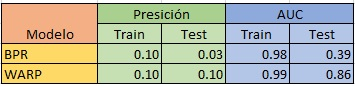

- Comparativa con el BenchMark del **Proyecto 03**

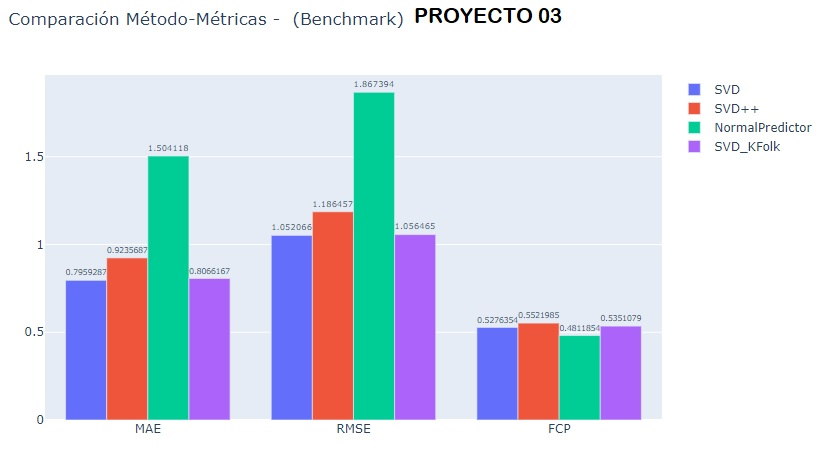

- **Comparativa Global** En este gráfico se observa todas las metricas y modelos utilizados en el proyecto 3 y 4, para el proyecto 4 se utilizarón otros modelos antes mencionados (BaseLineOnly, SlopOne, KNNBasic) agregandose otros como LightFM, BPR, WARP y con el sistema de recomendación basado en contenido la métrica de similitud euclidina (Mostrada en Matriz) la cual se utilizo en la creación del modelo basado en contenido mostrada como matriz.(cercano a 1 mayor similitud entre peliculas)

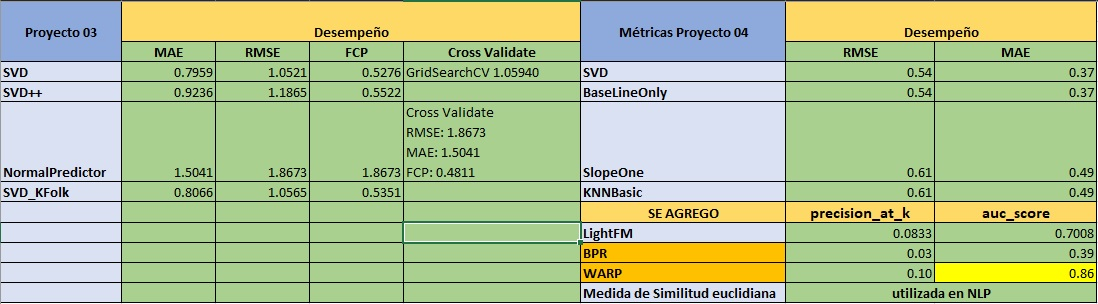

- Vale la pena señalar que, en términos generales, los métodos de filtrado colaborativo requieren datos suficientes (interacción usuario-elemento) para obtener buenos resultados.

- Al investigar al Respecto las mejores métricas para un sistema de recomendación son : AUC y precision k , por lo cual es este proyecto incluimos estas métricas, ya que anteriormente utilizamos RMSE, MAE. (las cuales tambien se incluyen en este proyecto, utilizando librerias Surprice y lightFM; utilizando algunos de sus algoritmos o modelos)


- Realizamos el sistema de recomendación con un enfoque de Procesamiento de Lenguaje Natural y vemos que es muy eficiente, el manejo de este, manajenado pesos para cada una de las palabras.
